In [1]:
import numpy as np 
import pandas as pd 
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt
import warnings

In [2]:
def plot_cmat(yte, ypred):
    '''Plotting confusion matrix'''
    skplt.plot_confusion_matrix(yte,ypred)
    plt.show()

In [3]:
# Import dataset for training using Pandas
news = pd.read_csv('datasets/train.csv')
text = news['text'].astype('U')
label = news['label'].astype('U')

In [4]:
text.head()

0    House Dem Aide: We Didn’t Even See Comey’s Let...
1    Ever get the feeling your life circles the rou...
2    Why the Truth Might Get You Fired October 29, ...
3    Videos 15 Civilians Killed In Single US Airstr...
4    Print \r\nAn Iranian woman has been sentenced ...
Name: text, dtype: object

In [5]:
# Splitting the dataset into test and train
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2, random_state=5)

In [6]:
# Insert spliitted data into TfidfVectorizer and transform shape
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [7]:
transformed_text_train = vectorizer.fit_transform(text_train)
transformed_text_test = vectorizer.transform(text_test)
filename_vectorizer = 'TfidfVectorizer.sav'
pickle.dump(vectorizer, open(filename_vectorizer, 'wb')) # Saving model

In [8]:
# Initialize Classifier
classifier = PassiveAggressiveClassifier(max_iter=100)

classifier.fit(transformed_text_train, label_train)

PassiveAggressiveClassifier(max_iter=100)

In [9]:
# Start Predict
predict = classifier.predict(transformed_text_test)

filename = 'ClassifierModel.sav'
pickle.dump(classifier, open(filename, 'wb')) # Saving model

Accuracy Score: 96.03%
K Fold Accuracy: 96.29%

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2060
           1       0.96      0.96      0.96      2100

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160


Confusion Matrix
[[1969   91]
 [  74 2026]]


E:\MachineLearning\FakeNewsClassifier\env\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


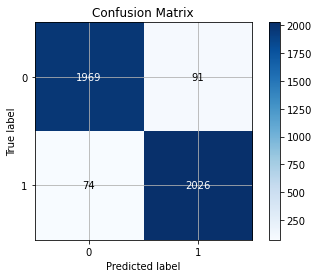

In [10]:
# Get Accuracy Score
score = accuracy_score(label_test, predict)
print("Accuracy Score: %.2f%%" % (score*100))

X = vectorizer.transform(news['text'].astype('U'))
kscore = cross_val_score(classifier, X, news['label'].values, cv=5)
print(f'K Fold Accuracy: {round(kscore.mean()*100,2)}%')

print("\nClassification Report")
print(classification_report(label_test, predict))

print("\nConfusion Matrix")
print(confusion_matrix(label_test, predict))

plot_cmat(label_test, predict) # Show Confusion Matrix